***Avant de continuer, assurez-vous d'avoir suivi la procédure pour faire fonctionner le kernel C de Jupyter (voir Moodle). La partie droite de la barre des menus de Jupyter doit ressembler à ceci :***

<center>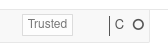<center>

La matière _Langage C_ est un petit module de trois séances au sein de l'UE Analyse de Données et Automatique. Le but du module est de vous faire découvrir un autre langage impératif, et de vous introduire à un langage que vous utiliserez abondamment au second semestre, au cours de l'UE Systèmes d'Exploitation Centralisés, notamment. Elle est complétée par un autre module de 3 séances, au début du second semestre.

Cette matière prend la forme de _classeurs Jupyter_, à lire/intéragir _en autonomie_ et <u>_en binôme_</u>. L'encadrant.e de TP est surtout là pour vous décoincer ou apporter des compléments sur le contenu du classeur.

La matière Langage C est évaluée selon deux modalités :
  1. Un "projet" (court) à rendre en binôme, introduit dans le troisième et dernier classeur
  2. Un partiel, sous la forme d'un QCM de 30 minutes à correction automatique

*Ceci est le classeur numéro **1** de la matière Langage C du **1er semestre**, à réaliser dans le temps de la première séance de Langage C.*

Ce premier classeur contient les points suivants :
 - Présentation du langage C
 - Bases du langage
   + Structure de base
   + Littéraux
   + Variables
   + Structures de contrôle
   
Il se termine avec quelques petits exercices de mise en pratique. (Ces exercices ne sont pas à rendre mais vous pouvez bien sûr les envoyer à votre encadrant.e de TP pour qu'iel y jette un oeil).

_Note : tout au long du classeur, vous trouverez des [liens hypertextes](https://fr.wikipedia.org/wiki/Hyperlien) indiqués en bleu ; ils mènent généralement à des compléments d'information, pour votre culture personnelle !_

# Le langage C : présentation

Le C est un langage de programmation conçu en 1972 par Dennis Ritchie des laboratoires Bell. Initialement proposé comme surcouche du langage assembleur, le C a beaucoup gagné en popularité dans les années 80. Aujourd'hui encore, ce langage est utilisé un peu partout dans le paysage informatique, [et continue d'évoluer](https://en.wikipedia.org/wiki/C23_(C_standard_revision)).

Le C est un langage :
 * compilé : on utilise un compilateur pour transformer des sources C en binaire exécutable
 * impératif et structuré : un programme se compose de successions d'instructions et de structures de contrôle (boucles, conditionnelles, etc.), et peut êre découpé en sous-programmes
 * à typage statique explicite : le type des variables est donné dans le code et ne peut pas changer, et la concordance entre les types est calculée à la compilation
 
Bien que ces caractéristiques le rapprochent de langages comme Ada, le C est un langage _bas niveau_, c'est-à-dire _très proche de la machine_. Il faut gérer la plupart des ressources soi-même (mémoire, fichiers, etc.) et on a un contrôle très fin sur le programme (taille des variables en mémoire, dialogue avec le système d'exploitation...). C'est un langage qui fait assez peu de choses « tout seul » : ce qui est écrit est exécuté, et rien de plus.

Pour ces raisons, le C est très utilisé pour écrire des _drivers_, des fragments de systèmes d'exploitation, ou encore des contrôleurs de _systèmes embarqués_, où on a besoin d'être très précis sur le comportement du programme. On l'utilise aussi dans des applications à hautes performances en mémoire et en temps.

Dans une [étude de 2017 comparant les performances de différents langages de programmation](https://dl.acm.org/doi/pdf/10.1145/3136014.3136031), le C se hisse sans problème sur le podium comme un des langages les plus rapides, les plus efficaces en temps, en énergie, et en mémoire !

## Compilation et exécution

Comme dit plus haut, le langage C est _compilé_. Les fichiers source ont généralement pour extension `.c`. Ils sont donnés à un _compilateur_ pour être compilés en _fichiers objets_ (`.o`). Ces fichiers objets sont rassemblés et transformés en binaire lors d'une étape appelée _édition des liens_.

<center>

</center>

_Il existe un très grand nombre de compilateurs pour le C. Nous utiliserons `gcc` ([the GNU C Compiler](https://gcc.gnu.org/)) car c'est celui qu'on trouve par défaut sur les machines Linux, et aussi parce qu'il est open source et gratuit._

Un _fichier source_ est un fichier texte non-formaté qui contient du code. Les fichiers source C ont pour extension `.c` (ou `.h` pour les modules). On peut éditer un fichier `.c` avec un éditeur textuel de base : SublimeText, vim, gedit... (**pas** LibreOffice ou autre).
    
Pour compiler un fichier source `.c` en fichier objet `.o`, on utilise la commande suivante (dans un terminal) :
```
gcc -c truc.c -o truc.o
```

(`-c` indique à GCC qu'il faut <u>c</u>ompiler le fichier, `-o` donne le nom de la sortie (<u>o</u>utput))

Le compilateur accepte diverses options, notamment pour contrôler le niveau d'analyse du compilateur. Nous recommandons *très très vivement* de compiler avec les options `-Wall` et `-Wextra`, qui indiquent au compilateur d'analyser le code en profondeur pour deviner des situations potentiellement erronées (qu'il remontera sous forme de messages d'avertissement ou *warnings*).
```
gcc -Wall -Wextra -c bidule.c -o bidule.o
```
    
Pour l'éditeur de lien, on utilise aussi GCC. La commande pour créer un exécutable (ici, `mon_programme`) à partir d'un ensemble d'objets est la suivante :
    
```
gcc truc.o machin.o bidule.o -o mon_programme
```

_(notez l'absence de l'option `-c`)_

On peut ensuite lancer l'exécutable créé en faisant `./mon_programme` dans le terminal.
    
<br>

Lorsqu'un programme ne contient _qu'un seul fichier source_, on peut demander à GCC de le compiler et de le lier en une seule commande :

```
gcc machin.c -o mon_programme
```

## Utilisation du notebook

Une partie importante de cette UE se déroulera sur **Jupyter**. C'est lui qui prend en charge la compilation ; en fait, il se charge tout seul d'appeler GCC, de récupérer le programme (ou les erreurs !) puis de l'exécuter.
    
Jupyter fait compiler et exécute le programme résultant à chaque fois que l'on appuie sur "Exécuter" (ou en faisant Ctrl+Entrer) lorsqu'on est dans une cellule contenant du code (on se "place" dans une cellule en cliquant dessus). Essayez donc d'exécuter le code ci-dessous :

In [24]:
#include <stdio.h>

int main() {
    puts("Le langage C c'est fantastique !");
    return 0;
}

Le langage C c'est fantastique !


Lorsque le code est erroné, Jupyter nous remonte les erreurs du compilateur. On aura plus qu'à corriger le code, et relancer la cellule.

Essayez de compiler/lancer le code ci-dessous :

In [6]:
#include <stdio.h>

int main() {
    puts("Je crois qu'il manque un point-virgule !")
    return 0;
}

/tmp/tmp18173kd6.c: In function ‘main’:
/tmp/tmp18173kd6.c:4:53: error: expected ‘;’ before ‘return’
    4 |     puts("Je crois qu'il manque un point-virgule !")
      |                                                     ^
      |                                                     ;
    5 |     return 0;
      |     ~~~~~~                                           
[C kernel] GCC exited with code 1, the executable will not be executed

*Excepté lorsque c'est explicitement demandé, vous pouvez réaliser toutes les manipes et exercices de cette UE dans le Jupyter. Vous pouvez bien sûr les réaliser en dehors, en copiant-collant le code dans un fichier source et en le compilant à la main.*

**Note :** certaines cellules contiennent des directives spéciales à leur début (qu'on reconnaît car elles commencent par `//%`) qui permettent de configurer le compilateur utilisé par Jupyter. Ces directives permettent notamment de donner accès à des modules spéciaux pour l'affichage et les tests.

Vérifiez que vous pouvez bien exécuter le bloc de code suivant. Si ce n'est pas le cas, c'est probablement que vous n'avez pas tout récupéré de Moodle !

In [1]:
//%cflags: -I.
//%ldflags: -L. -lt
#include <stdio.h>
#include <stdlib.h>
#include "affichage.h"
#include "tests.h"

int main() {
    INITIALIZE_TESTS();
    afficher_nl("Hello world!");
    return 0;
}

Hello world!


**Notez que votre classeur est _personnel_ (et pas partagé). Il ne faut donc surtout pas hésiter à triturer le code, ajouter des cellules (icône en forme de `+` en haut de la page) et les éditer (double-click sur une cellule), exécuter et ré-exécuter le code !**

# Bases du langage

Après cette introduction, passons aux choses sérieuses. Dans cette section, nous allons voir les bases du langage, qui devraient vous permettre d'écrire de petits algorithmes.

Dans les classeurs suivants, nous verrons quelques concepts un peu plus avancés qui permettent d'attaquer de vrais sujets, et au semestre prochain nous nous plongerons dans des sujets plus techniques autour de la mémoire.

<br>

_Note : dans la suite, nous utiliserons principalement le petit module `affichage`, qui est un module développé en interne pour simplifier l'affichage d'expressions. La documentation du module est disponible sur Moodle._

## Structure générale

Un fichier source en C se compose principalement de _sous-programmes_. Parmi ces sous-programmes, il y en a un spécial qui s'appelle `main` : c'est le programme principal, la procédure qui sera appelée par le système lorsqu'on exécutera le programme ! (à noter qu'un programme doit présenter _exactement **une**_ fonction principale).

**Les instructions du programme doivent se trouver dans un sous-programme** (incluant `main`). Seules des _déclarations_ et potentiellement des _déclarations-affectations_ peuvent se trouver en dehors de sous-programmes, nous verrons cela plus tard.

En plus du code C, un fichier peut faire référence à un _module_, à l'aide de la commande spéciale `#include`. Cette commande est suivie du nom de la spécification du module (`xxx.h`), entre chevrons si c'est une bibliothèque globale, et entre guillemets si c'est un fichier utilisateur/local (nous verrons plus tard dans l'UE comment définir ses propres modules).

In [1]:
//%cflags: -I.
/* 
Un exemple de source C, contenant un programme principal.
*/
#include <stdlib.h> // Module "stdlib" de la librairie standard de C
#include <stdio.h> // Module "stdio" d'une bibliothèque globale au système
#include "affichage.h" // Module "affichage" fourni localement

int main() { // Mon programme principal
    puts("Instruction 1"); // Le sous-programme "puts" affiche la chaîne de caractère donnée
    puts("Instruction 2");
    return 0;
}

Instruction 1
Instruction 2


Au passage, notez la syntaxe pour les commentaires : `// ...` pour les commentaires sur une ligne, et `/* ... */` pour les commentaires sur plusieurs lignes (ou au milieu du code) !

En C, les accolades (`{` et `}`) délimitent ce que l'on appelle un _bloc_. Nous verrons plus tard plusieurs utilisations de ces bloc. En attendant, rappelez-vous que accolades = bloc.

Bien sûr, il est possible d'écrire des blocs dans d'autres blocs, avec autant d'imbrication que nécessaire. On remarquera, notamment, qu'un sous-programme définit un bloc.

In [4]:
#include <stdlib.h>
#include <stdio.h>

int main() { // Le bloc main
    puts("Début du bloc main");
    {
        puts("Début d'un bloc imbriqué");
        {
            puts("À l'interieur du bloc dans le bloc dans le bloc");
        }
        puts("Fin du bloc imbriqué");
    }
    puts("Fin du bloc main");
    return 0;
}

Début du bloc main
Début d'un bloc imbriqué
À l'interieur du bloc dans le bloc dans le bloc
Fin du bloc imbriqué
Fin du bloc main


Vous remarquerez que les blocs n'entravent pas l'exécution du code. Les instructions s'exécutent à la suite (comme dans tout bon langage impératif !).

<br>

**Note :** en C la convention est d'ajouter un niveau d'indentation à chaque début de bloc, et d'en retirer un à la fin du bloc (de sorte que les éléments d'un sous-bloc soient plus à droite que les éléments du bloc englobant). Les éléments d'un même bloc doivent être indentés au même niveau. En général, on indente en utilisant quatre espaces.

## Littéraux et expressions

Le langage C propose un certain nombre d'opérateurs usuels, qui permettent de construire des expressions complexes.

### Nombres

 - nombres entiers : une suite de chiffres (`0`, `13`, `716287`)
 - nombres flottants : une suite de chiffres avec un point (`0.123`), ou notation scientifique (`1.723e-6`)
 - nombres entiers en _hexadécimal_ (= base seize) : une suite de chiffres ou de lettres entre A et F, précédé de `0x` (`0x1234ABCD`)
 - nombres entiers en _octal_ (= base huit) : suite de chiffres entre 0 et 7 commençant par un `0` (`00`, `0123`, `0777`)
 - `a + b` : addition
 - `a - b` : soustraction
 - `- a` : opposé
 - `a * b` : multiplication
 - `a / b` : division
 - `a % b` : modulo (= reste de la division euclidienne de `a` par `b`); attention ça ne marche que sur les entiers !

Les priorités respectives de ces opérateurs sont celles habituelles (`-` unaire > `*`, `/`, `%` > `+`, `-`) et on peut utiliser des parenthèses. À noter par ailleurs que tous ces opérateurs sont associatifs (à droite).

In [2]:
//%cflags: -I .
#include "affichage.h"

int main() {
    afficher_entier(3 + 5);
    afficher_entier(2023 % 17);
    afficher_entier(1 + 2 + 3 + 4 + 5);
    afficher_flottant(3.0 * 2.0);
    afficher_flottant(- 1e-4 * (2.1 + 3.001e2) / 0.01);
    afficher_flottant(2.0 * 3.0 * 4.0 / 2.0);
    afficher_hexa(0x1316);      // Affiche sous forme hexadécimale
    afficher_hexa(0x3756FAB);
    afficher_entier(0xAB - 0x30 - 0x02);         // Affiche en base 10
    return 0;
}

3 + 5 = 8
2023 % 17 = 0
1 + 2 + 3 + 4 + 5 = 15
3.0 * 2.0 = 6.000000
- 1e-4 * (2.1 + 3.001e2) / 0.01 = -3.022000
2.0 * 3.0 * 4.0 / 2.0 = 12.000000
0x1316 = 1316
0x3756FAB = 3756fab
0xAB - 0x30 - 0x02 = 121


### Booléens

Le langage C n'a pas de "vrais" booléens. En fait, on considère que le nombre 0 correspond à _faux_, et tout ce qui n'est pas 0 est _vrai_.

Dans la pratique, un module (`stdbool`) permet d'avoir un alias de type `bool` et des constantes `true` et `false`, mais ce n'est pas pareil qu'avoir un vrai type pour les booléens.

On peut composer les booléens de la façon suivante :

 - `a && b` : conjonction, `a` et `b` sont vrais
 - `a || b` : disjonction, `a` ou `b` (ou les deux) sont vrais
 - `!a` : négation

Les priorités sont celles usuelles (`!` > `&&` > `||`) et on peut utiliser des parenthèses.

In [6]:
//%cflags: -I .
#include <stdbool.h>     // Pour avoir true et false
#include "affichage.h"

int main() {
    afficher_booleen(true);
    afficher_booleen(false);
    afficher_booleen(1);
    afficher_booleen(3.726);
    afficher_booleen(-5);
    afficher_booleen(0);
    afficher_booleen(true || false);
    afficher_booleen(true && true);
    afficher_booleen(!true);
    afficher_booleen(!true && (true || false || true));
    // Preuve que les booléens sont des entiers...
    afficher_entier(true);
    afficher_entier(false);
    afficher_entier(true + true); // Ne jamais faire ça dans du vrai code !!
    afficher_booleen(2 * 3); // 2 * 3 == 6 différent de 0 donc vrai
    afficher_booleen(4 / 5); // 4 / 5 == 0 donc faux
    return 0;
}

true = vrai
false = faux
1 = vrai
3.726 = vrai
-5 = vrai
0 = faux
true || false = vrai
true && true = vrai
!true = faux
!true && (true || false || true) = faux
true = 1
false = 0
true + true = 2
2 * 3 = vrai
4 / 5 = faux


### Comparaison

Les opérateurs de comparaison marchent sur les nombres principalement. Ils renvoient des booléens, et peuvent donc être composés pour former des prédicats complexes.

  - `a == b` : égalité, `a` et `b` ont exactement la même valeur
  - `a != b` : différence
  - `a <= b` : `a` inférieur ou égal à `b`
  - `a < b`  : `a` inférieur strictement à `b`
  - `a >= b` : `a` supérieur ou égal à `b`
  - `a > b`  : `a` supérieur strictement à `b`

Les opérateurs de comparaison ne sont pas associatifs (`a <= b <= c` ne fonctionne pas). Ils sont moins prioritaires que les opérateurs sur les entiers, et plus que ceux sur les booléens, ce qui facilite l'écriture de prédicats complexes sans parenthèses.

In [41]:
//%cflags: -I .
#include "affichage.h"

int main() {
    afficher_booleen(3 <= 5);
    afficher_booleen(2 + 6 == 8);
    afficher_booleen(2 <= 6 / 2 && 6 / 3 < 3); // (2 <= (6 / 2)) && ((6 / 3) < 3)
    afficher_booleen(7.11 < 2.293);
    afficher_booleen(7.0e-4 < -3.1e-3);
}

3 <= 5 = vrai
2 + 6 == 8 = vrai
2 <= 6 / 2 && 6 / 3 < 3 = vrai
7.11 < 2.293 = faux
7.0e-4 < -3.1e-3 = faux


[Pour des raisons un peu techniques](https://en.wikipedia.org/wiki/IEEE_754), il faut toujours se méfier lorsque l'on compare des flotants : des nombres flottants qui ont "l'air" égaux ne le sont pas forcément...

En fait, un nombre flottant étant la représentation _finie_ d'un concept mathématique _infini_, il ne peut s'agir que d'une approximation. Autrement dit, **les nombres et les calculs flottants sont toujours un petit peu faux.**

Ce imprécisions passent globalement inaperçues, mais peuvent se cumuler et devenir problématiques. Cela rend notamment l'_égalité_ peu fiable.

In [5]:
//%cflags: -I .
#include "affichage.h"

int main() {
    float x = 0.1;
    float y = 0.2;
    afficher_flottant_precis(x, 10); // Afficher 10 décimales
    afficher_flottant_precis(y, 10);
    afficher_booleen(x + y == 0.3);  // 0.1 + 0.2 == 0.3, normalement...
    afficher_flottant_precis(x + y, 10);
    
    nouvelle_ligne();
    
    afficher_flottant(x * y);
    afficher_booleen(x * y == 0.02); // 0.1 * 0.2 == 0.02, normalement...
    afficher_flottant_precis(x * y, 10);
    return 0;
}

x = 0.1000000015
y = 0.2000000030
x + y == 0.3 = faux
x + y = 0.3000000119

x * y = 0.020000
x * y == 0.02 = faux
x * y = 0.0200000014


**En règle générale, on n'utilise _jamais_ l'égalité sur les flottants.**

À la place de $x == y$, on écrit plutôt une condition du type "$x$ est _suffisamment proche_ de $y$" : $|x - y| < \epsilon$, $\epsilon$ fixé et dépendant de la précision des flottants (assez souvent $10^{-6}$, vous verrez ça plus en détail dans vos UE de mathématiques appliquées).

In [2]:
//%cflags: -I . -lm
#include <math.h>       // Fonction fabs pour la valeur absolue
#include "affichage.h"

int main() {
    float x = 0.1;
    float y = 0.2;
    afficher_flottant(x * y);
    afficher_booleen(fabs(x * y - 0.02) < 1e-6);
    return 0;
}

x * y = 0.020000
fabs(x * y - 0.02) < 1e-6 = vrai


### Caractères et chaînes de caractères

Le C permet d'écrire des caractères comme littéraux. Les caractères sont délimités par des apostrophes (_simple quotes_, `'`) : `'a'`, `'6'`, etc. Pour avoir le caractère "apsotrophe", il faut _l'échapper_ avec un _backslash_ (`\`, Alt Gr + 8 sur un clavier AZERTY standard) : `'\''`. De même, pour avoir le caractère _backslash_, il faut l'échapper aussi : `'\\'`.

À noter que C ne reconnaît que les caractères du [jeu de caractères ASCII](https://fr.wikipedia.org/wiki/American_Standard_Code_for_Information_Interchange). Cela exclue donc un certain nombre de caractères (notamment certaines lettres accentuées... et les emojis 🙁).

Dans la pratique, les caractères en C sont en fait _des entiers_. Cela signifie que l'on peut les utiliser dans des expressions (avec `+`, `-`, `<=`, ...), avec parcimonie bien sûr.

In [1]:
//%cflags: -I .
#include "affichage.h"

int main() {
    afficher_carac('a');
    afficher_carac('0');
    afficher_carac('\'');
    afficher_carac('\\');
    afficher_entier('z');
    afficher_carac('a' + 1);
    afficher_carac('C' - 2);
    afficher_booleen('g' > 'a');
    // Attention l'encodage rend parfois les choses peu intuitives
    afficher_booleen('B' > 'a');
}

'a' = a
'0' = 0
'\'' = '
'\\' = \
'z' = 122
'a' + 1 = b
'C' - 2 = A
'g' > 'a' = vrai
'B' > 'a' = faux


Il existe d'autres caractères "spéciaux", fort utiles. Par exemple :

 - `\n` affiche un _retour à la ligne_
 - `\t` affiche une _tabulation_

Le C permet aussi d'écrire des _chaînes de caractères_ comme littéraux, délimitées par des guillemets `"`. Nous reviendrons plus tard sur la nature exacte d'une chaîne de caractères lorsque nous verrons les tableaux.

Une chaîne de caractère peut contenir divers caractères spéciaux, qui commencent avec un backslash (`\\`, `\n`, `\t`, `\"`...).

In [10]:
//%cflags: -I .
#include "affichage.h"

int main() {
    afficher_chaine("Ma chaîne de caractères");
    afficher_chaine_nl("Une chaîne\n\tde caractères\n\t\tsur plusieurs lignes");
    afficher_chaine_nl("Des backslash \\, des guillemets \", " // On peut écrire une chaîne sur plusieurs lignes !
       "des simple quote ' (pas besoin d'échapper celui là !)'");
}

"Ma chaîne de caractères" = Ma chaîne de caractères
"Une chaîne\n\tde caractères\n\t\tsur plusieurs lignes" = 
Une chaîne
	de caractères
		sur plusieurs lignes
"Des backslash \\, des guillemets \", " "des simple quote ' (pas besoin d'échapper celui là !)'" = 
Des backslash \, des guillemets ", des simple quote ' (pas besoin d'échapper celui là !)'


À noter que le C n'a pas d'opérateurs particuliers pour manipuler les chaînes. En particulier, il n'est pas trivial de les concaténer, de les comparer, etc.

## Variables et types

Le C permet de déclarer des _variables_. Une variable est un emplacement mémoire associé à un nom, qui permet de stocker une donnée. Une déclaration de variable prend la forme
```c
<type> <nom>;
```

Une fois déclarée, on peut _affecter_ une variable avec le symbole `=` :
```c
<nom> = <expression>;
```

Le C nous laisse aussi réaliser simultanément la déclaration _et_ l'affectation de la variable, dans une instruction que l'on appelle _déclaration-affectation_ :
```c
<type> <nom> = <expression>;
```

Le nom d'une variable se compose de chiffres, lettres et underscore (`_`), et doit commencer par une lettre ou un underscore. Par convention, les variables locales commencent généralement par une minuscule ou un underscore.

Le type d'une variable peut être un type utilisateur (abordé plus tard dans l'UE) ou l'un des types dits _primitifs_ du C, à savoir :
 * Un caractère (`char`)
 * Un entier court, normal ou long (`short`, `int`, `long`), potentiellement non-signé (`unsigned`)
 * Un flottant simple ou double précision (`float`, `double`)
 * Un booléen (`bool`)
 * Un pointeur ou un tableau (vu plus tard)

Une fois déclarée, une variable peut s'utiliser comme n'importe quel autre élément dans des expressions (calculs, appels de sous-programmes, etc.). Le type de la variable détermine ce que l'on a le droit de faire avec, et donne des indications au compilateur sur les comportements attendus des instructions.

In [1]:
//%cflags: -I.
#include "affichage.h"

int main() {
    int variable_entiere;
    variable_entiere = 5;
    afficher_entier(variable_entiere);
    
    double variable_reelle = 3.62738e-9;
    afficher_scientifique(variable_reelle);
    
    unsigned int non_signe = 2789;
    afficher_entier_ns(non_signe);
    
    // On peut déclarer plusieurs variables de même type à la fois !
    double x, y, z;
    x = 1.0;
    y = 2.0;
    z = x * x + y * y;
    afficher_flottant(z);
    
    // Certaines déclarations peuvent être des affectations
    char a = 'a', b, c = 'c', d;
    b = a + 1;
    d = c + 1;
    afficher_carac(a);
    afficher_carac(b);
    afficher_carac(c);
    afficher_carac(d);
}

variable_entiere = 5
variable_reelle = 3.627380e-09
non_signe = 2789
z = 5.000000
a = a
b = b
c = c
d = d


On notera que, contrairement à ADA ou Fortran, le C nous laisse déclarer des variables au beau milieu d'un bloc. *Pour des raisons de lisibilité, il faut essayer d'éviter de déclarer les variables à n'importe quel moment.*

Une bonne pratique est de déclarer les variables dont on a besoin dans le bloc au début dudit bloc.

**Attention : une variable déclarée sans être affectée contient une valeur _indéfinie_.** Le compilateur _n'initialise pas les variables_, donc ce qu'elles contiennent est complètement aléatoire.

Par exemple, exécutez plusieurs fois ce code :

In [10]:
//%cflags: -I.
#include "affichage.h"

int main() {
    int a, b, c;
    float d, e;
    
    afficher_entier(a);
    afficher_entier(b);
    afficher_entier(c);
    afficher_flottant(d);
    afficher_flottant(e); // Il y a de fortes chances que cette variable varie beaucoup
}

a = 0
b = 0
c = 0
d = 0.000000
e = -8368724377600.000000


Vous l'aurez compris, la bonne pratique est de **toujours initialiser ses variables**, même si c'est avec un 0.

### Affectation-opération

Il est très courant dans un programme que l'on veuille mettre à jour la valeur d'une variable à partir de sa valeur actuelle (exemple typique : _incrémenter_ une variable). Le langage C met à disposition des opérateurs combinés qui réalisent à la fois l'affectation et le calcul : les affectations-opérations.

Tous les opérateurs (arithmétiques) ont une version avec affectation, qui réalise la composition de la valeur de la variable avec l'opérande (dans ce sens là) :
 * `a += 2` => `a = a + 2`
 * `a -= 2` => `a = a - 2`
 * `a *= 2` => `a = a * 2`
 * `a /= 2` => `a = a / 2`
 * `a %= 2` => `a = a % 2`

In [36]:
//%cflags: -I .
#include "affichage.h"

int main() {
    int a1 = 0, a2 = 0;
    a1 += 5; a2 = a2 + 5;
    afficher_entier(a1); afficher_entier(a2);
    nouvelle_ligne();
    
    a1 *= 2 + 3; a2 = a2 * (2 + 3); // La partie droite est une expression !
    afficher_entier(a1); afficher_entier(a2);
    nouvelle_ligne();
    
    float b1 = 0.0, b2 = 0.0; // Ça marche aussi sur les flottants
    b1 -= 5.0; b2 = b2 - 5.0;
    afficher_flottant(b1); afficher_flottant(b2);
    nouvelle_ligne();
    b1 /= 3.0 - b1; b2 = b2 / (3.0 - b2);
    afficher_flottant(b1); afficher_flottant(b2);
    
    return 0;
}

a1 = 5
a2 = 5

a1 = 25
a2 = 25

b1 = -5.000000
b2 = -5.000000

b1 = -0.625000
b2 = -0.625000


Les opérations d'ajouter et de retirer 1 à un entier sont tellement communes qu'elles ont le droit à leur propre opérateur. Il s'agit de :
 * l'_incrémentation_, `a++` ou `++a`, équivalent à `a += 1`
 * la _décrémentation_, `a--` ou `--a`, équivalent à `a -= 1`

In [31]:
//%cflags: -I .
#include "affichage.h"

int main() {
    int a = 0;
    a++;
    afficher_entier(a);
    ++a;
    afficher_entier(a);
    a--;
    afficher_entier(a);
    
    return 0;
}

a = 1
a = 2
a = 1


**Note :** il y a une différence subtile entre `a++` et `++a` (et similairement avec `--`) même si au final les deux variantes font la même chose. Cette différence est dans la _valeur_ retournée : en fait, toutes les affectations-opérations retournent une valeur. Pour `a++` (et `a--`) il s'agit de la valeur de `a` _avant_ l'opération ; pour toutes les autre instructions, c'est la valeur _après_.

In [33]:
//%cflags: -I .
#include "affichage.h"

int main() {
    int a = 0;
    int b = (a += 2);
    afficher_entier(a);
    afficher_entier(b);
    nouvelle_ligne();
    
    int c = a++;
    afficher_entier(a);
    afficher_entier(c);
    nouvelle_ligne();
    
    int d = ++a;
    afficher_entier(a);
    afficher_entier(d);
    
    return 0;
}

a = 2
b = 2

a = 3
c = 2

a = 4
d = 4


#### Petit exercice : un programme de calcul

Écrire dans la cellule ci-dessous le programme de calcul suivant :
 * Soit $a$ un entier quelconque
 * Je pose $b = 3 \times a$
 * Je pose $c = a / 2$
 * J'incrémente $b$ ($b$ vaut maintenant $b + 1$)
 * Je multiplie $c$ par $b$ et je mets la valeur dans $c$
 * Je divise $c$ par $a$ et je mets la valeur dans $a$
 * J'affiche $a$

In [1]:
//%cflags: -I .
#include "affichage.h"

int main() {
    int a = 2121; /* À modifier pour tester le programme de calcul */
    
    /* À COMPLÉTER */
    
    afficher_entier(a);
}

a = 2121


### Portée et masquage

On dit qu'une variable est _accessible_ à un endroit donné du programme si on peut y faire référence dans une instruction à cet endroit. Par exemple :
```c
int a = 5;
afficher_entier(a + 3);
afficher_entier(b * 2);
int b = 3;

```

Dans le programme ci-dessus, la variable `a` est bien accessible pour la deuxième instruction : le compilateur n'affichera pas d'erreur. La variable `b` en revanche n'est _pas_ accessible pour la troisième instruction : le compilateur affichera une erreur (du type `<variable> undeclared`, variable non-déclarée).

La _portée_ d'une variable est _l'ensemble des endroits où elle est accessible_. Pour déterminer la portée d'une variable, le langage C obéit à une seule règle très simple :
> La portée d'une variable commence à sa déclaration, et termine à **la fin du _bloc_ dans laquelle
> elle a été déclarée**

Exemple :

In [10]:
//%cflags: -I .
#include "affichage.h"

int main() {
    int a; // Début de la portée de a
    a = 3;
    int b; // Début de la portée de b
    b = a + 2;
    {
        int c; // Début de la portée de c
        c = a + b; // Légal : a, b et c sont accessibles dans le bloc imbriqué !
        {
            int d; // Début de la portée de d
            d = c * b;
            c = d;
        } // Fin de la portée de d
        a = c * b; // Toujours légal : a, b et c sont encore accessibles
    } // Fin de la portée de c
    b = a; // Légal : a et b sont accessibles
    afficher_entier(b);
    return 0;
    // Fin de la portée de a et de b
}

b = 200


Contre-exemple qui donne des erreurs :

In [12]:
//%cflags: -I .
#include "affichage.h"

int main() {
    int a; // Début de la portée de a
    a = b; // Illégal : b pas encore défini
    int b; // Début de la portée de b
    b = a + 2;
    {
        int c; // Début de la portée de c
        c = a + b;
        {
            int d; // Début de la portée de d
            d = c * b;
            c = d; // Une variable accessible peut être à gauche ou à droite d'une affectation !
        } // Fin de la portée de d
        b = d; // Illégal : d n'est *plus* défini !
        a = c * b; // Toujours légal : a, b et c sont encore accessibles
    } // Fin de la portée de c
    b = c; // Illégal : c n'est plus définit !
    afficher_entier(b);
    return 0;
    // Fin de la portée de a et de b
}

/tmp/tmpp5ynsnzo.c: In function ‘main’:
/tmp/tmpp5ynsnzo.c:6:9: error: ‘b’ undeclared (first use in this function)
    6 |     a = b; // Illégal : b pas encore défini
      |         ^
/tmp/tmpp5ynsnzo.c:6:9: note: each undeclared identifier is reported only once for each function it appears in
/tmp/tmpp5ynsnzo.c:17:13: error: ‘d’ undeclared (first use in this function)
   17 |         b = d; // Illégal : d n'est *plus* défini !
      |             ^
/tmp/tmpp5ynsnzo.c:20:9: error: ‘c’ undeclared (first use in this function)
   20 |     b = c; // Illégal : c n'est plus définit !
      |         ^
[C kernel] GCC exited with code 1, the executable will not be executed

Le langage C autorise de déclarer des variables de même nom (et de type identique ou différent), _à condition de ne pas être dans le même bloc_.

On dit que la variable déclarée dans un bloc qui a le même nom qu'une variable dans un bloc englobant _masque_ cette variable. La variable qui masque est à considérer comme une nouvelle variable qui n'a rien à voir avec la variable masquée : son évolution est différente, son utilisation est différente...

À la fin du bloc, la variable "masquante" devient hors de portée : le nom de la variable fait alors bien référence à l'ancienne variable, dont la valeur n'a pas bougé !

Par exemple :

In [19]:
//%cflags: -I .
#include "affichage.h"

int main() {
    int a = 3;
    afficher_entier(a);
    {
        char a = '$'; // Masquage
        afficher_carac(a); // Le a ici est celui de la deuxième déclaration
    }
    afficher_entier(a); // Le a ici est bien celui de la première déclaration
    return 0;
}

a = 3
a = $
a = 3


Attention, on n'a pas le droit de déclarer des variables de même nom au même niveau :

In [20]:
//%cflags: -I .
#include "affichage.h"

int main() {
    int a = 3;
    char a = 'a';
    return 0;
}

/tmp/tmpj221v83f.c: In function ‘main’:
/tmp/tmpj221v83f.c:6:10: error: conflicting types for ‘a’
    6 |     char a = 'a';
      |          ^
/tmp/tmpj221v83f.c:5:9: note: previous definition of ‘a’ was here
    5 |     int a = 3;
      |         ^
[C kernel] GCC exited with code 1, the executable will not be executed

À noter que, tant qu'elle est masquée, la variable est _complètement inaccessible_ !

Le C autorise la déclaration(-affectation) de variables en dehors de tout bloc. La portée de la variable est alors tout le code entre sa déclaration et _la fin du fichier_. Une telle variable est dite **globale**, car accessible de partout.

In [3]:
//%cflags: -I .
#include "affichage.h"

int globale = 127;
float f1 = 35.0, f2 = 36.0;

int main() {
    afficher_entier(globale);
    globale++;
    afficher_entier(globale);
    
    float f1 = 121.0; // Masquage
    afficher_flottant(f1);
    
    f2 = f1 + f2;
    afficher_flottant(f2);
    
    // afficher_flottant(f3); // f3 hors portée
}

float f3 = 11.0;



globale = 127
globale = 128
f1 = 121.000000
f2 = 157.000000


Attention, il est interdit d'écrire des _instructions_ en dehors d'un bloc. Notamment, on ne peut pas déclarer-affecter une variable globale avec une expression non constante.

In [5]:
//%cflags: -I .
#include "affichage.h"

char x = 'x';
char y = x + 1; // Error: initializer element is not constant

int main() {
    afficher_carac(x);
}

/tmp/tmpfkws7llj.c:5:10: error: initializer element is not constant
    5 | char y = x + 1; // Error: initializer element is not constant
      |          ^
[C kernel] GCC exited with code 1, the executable will not be executed

### Transtypage

Le typage de C est statique (= connu à l'exécution), mais en même temps assez flexible. On peut sans problème demander au compilateur d'interpréter des expressions qui contiennent des éléments de types différents.

In [ ]:
//%cflags: -I .
#include "affichage.h"

int main() {
    afficher_flottant(3 + 2.0); // 3 : entier, 2.0 : flottant, type attendu de l'expression : flottant
    int x = 5 + 'a';            // 5 : entier, 'a' : caractère, type attendu de l'expression : entier
    afficher_entier(x); 
    afficher_entier(3 + 2.0);
    afficher_entier(2.0 + 3);
    return 0;
}

On peut demander explicitement au compilateur de convertir une valeur dans un type donné en indiquant le type entre parenthèses avant l'expression ou la sous-expression. Ou parle de conversion _explicite_.

In [9]:
//%cflags: -I .
#include "affichage.h"

int main() {
    afficher_flottant(((float) 3) + 2.0); // 3 : entier converti en flottant, 2.0 : flottant
    int x = 5 + ((int) 'a');              // 5 : entier, 'a' : caractère converti en entier
    afficher_entier(x);
    afficher_entier(3 + ((int) 2.0));     // On convertit 2.0 en entier
    afficher_entier(((int) 2.0) + 3);
    return 0;
}

((float) 3) + 2.0 = 5.000000
x = 102
3 + ((int) 2.0) = 5
((int) 2.0) + 3 = 5


La bonne pratique en C est **d'éviter à tout prix les conversions implicites**. Comme on le voit dans l'exemple précédent, le résultat n'est pas toujours très intuitif, et potentiellement gravement erroné.

## Structures de contrôle

Comme la plupart des langages, le langage C offre diverses _structures de contrôle_ pour écrire des programmes complexes. Ces structures fonctionnent _exactement comme en Ada_, avec simplement une syntaxe légèrement différente.

### Conditionnelles (Si-Alors-Sinon/`if-then-else`)

La structure conditionnelle permet d'exécuter du code que si la condition donnée est vraie :

In [22]:
#include <stdio.h>

int main() {
    int a = 5; // <- essayer d'autres valeurs
    
    if (a == 0) { // Code exécuté si a est égal à 0
        puts("Oui a vaut 0");
    } else {
        puts("Non a ne vaut pas 0");
    }
    return 0;
}

Non a ne vaut pas 0


La condition est donnée entre parenthèses (obligatoires), et peut être composée comme les expressions booléennes. La spécificité de C (que tout ce qui est 0 est `false` et tout le reste est `true`) est aussi valable ici.

In [7]:
#include <stdio.h>

int main() {
    int a = 2023; // <- essayer d'autres valeurs
    
    if (a % 17 == 0 && a % 10 == 3) {
        puts("a est divisible par 17 et finit par un 3");
    } else {
        puts("a n'est pas divisible par 17 ou ne finit pas par un 3");
    }
    
    char b = 'A'; // <- essayer d'autres valeurs
    
    if (b - 'A' && b - 'B') { // Implicitement : b - 'A' != 0 && b - 'B' != 0 (pas très beau)
        puts("Ni b - 'A' ni b - 'B' ne valent 0");
    } else {
        puts("b est 'A' ou 'B'");
    }
    
    float c = 1.0; // <- essayer d'autres valeurs
    
    if (!c) { // Implicitement : !(c == 0.0) (vraiment pas beau, et potentiellement dangereux...)
        puts("c vaut 0");
    } else {
        puts("c ne vaut pas 0");
    }
    
    return 0;
}

a est divisible par 17 et finit par un 3
b est 'A' ou 'B'
c ne vaut pas 0


On peut écrire une conditionnelle sans bloc `else` (bloc _sinon_), ce qui est équivalent à avoir un bloc _sinon_ vide. Bien sûr, on rappelle qu'il est une _bonne pratique_ de toujours avoir un bloc _sinon_, quitte à ce qu'il soit vide.

In [8]:
#include <stdio.h>

int main() {
    int a = 0; // <- essayer d'autres valeurs
    
    if (a == 0) {
        puts("Je m'affiche");
    }
    // Code absolument équivalent en terme d'exécution
    if (a == 0) {
        puts("Je m'affiche");
    } else {}
    
    return 0;
}

Je m'affiche
Je m'affiche


Pour éviter d'imbriquer les conditionnelles, on peut définir des blocs _sinon si_ (`else if`) présentant une condition, et qui sont exécutés si la condition est vraie _et qu'aucun autre bloc avant n'a été exécuté_.

Dans une structure si-alors-sinon-si-alors-...-sinon, il n'y a donc toujours qu'**un seul bloc** qui est exécuté, le premier dont la condition s'évalue à vraie, ou alors le bloc _sinon_ si aucune condition n'est satisfaite (il ne peut y en avoir qu'un seul).

In [24]:
#include <stdio.h>

int main() {
    int a = 21;  // <- essayer d'autres valeurs
    
    if (a % 3 == 0) {
        puts("a divisible par 3");
    } else if (a % 2 == 0) {
        puts("a divisible par 2");
    } else if (a % 6 == 0) { // Ce code est inaccessible (= jamais exécuté)
        puts("a divisible par 6");
    } else {
        puts("a divisible par aucun entier connu");
    }
    
    return 0;
}

a divisible par 3


On notera que l'instruction `if`/`else if`/`else` est suivie _d'une pair d'accolades_ ; donc les blocs d'une conditionnelle sont bien des blocs "comme les autres", qui obéissent aux même règles en termes de portée et de masquage !

In [37]:
//%cflags: -I .
#include "affichage.h"

int main() {
    char z = '*'; // <- essayer d'autres valeurs
    
    if (z == '*') {
        char y = 'a'; // Variable locale, inaccessible en dehors du bloc
        afficher_carac(y);
        afficher_carac(z); // z accessible dans bloc imbriqué
    } else {
        char z = '$'; // Masquage de z
        afficher_carac(z);
    }
    // afficher_carac(y); // y n'est pas accessible en dehors du bloc !
    afficher_carac(z); // Ce z correspond au z de la première déclaration
    
    return 0;
}

y = a
z = *
z = *


#### Petit exercice : calculer maximum et minimum

Compléter la cellule ci-dessous pour que le code calcule le minimum et le maximum des trois valeurs `a`, `b` et `c`, stockés (respectivement) dans les variables `min` et `max`.

In [9]:
//%cflags: -I .
#include "affichage.h"

int main() {
    // Variables d'entrée de l'algo (à changer pour tester)
    float a = 121.785;
    float b = -13.8;
    float c = 0.01;
    
    float min, max;
    
    /* À COMPLÉTER */
    
    // Affichage
    afficher_flottant(min);
    afficher_flottant(max);
}

min = 0.000000
max = -7120231555986124706277522145280.000000


### Cas (`switch`-`case`)

La structure `switch`-`case` permet d'exécuter un bloc de code en fonction de la valeur que prend une expression. C'est une structure pratique quand on doit enchaîner des blocs conditionnels où la condition est une simple égalité. C'est aussi pratique pour les types "finis" (voir plus loin sur les types utilisateurs).

In [8]:
//%cflags: -I .
#include "affichage.h"

int main() {
    int x = 0; // <- essayer d'autres valeurs
    
    switch(x) {
        case 0:
            afficher_nl("x est 0");
            break;
        case 1:
            afficher_nl("x est 1");
            break;
        case 2:
            afficher_nl("x est 2");
            break;
        default:
            afficher_nl("x est hors limite");
    }
    
    return 0;
}

x est 0


On donne la valeur à laquelle comparer l'expression après le mot-clef `case`. Le code dans chaque bloc `case` doit terminer par l'instruction spéciale `break`, qui interrompt le flot d'exécution et sort du `switch`. Le bloc `default` est exécuté si aucun cas ne correspond à la variable (il joue le rôle de bloc `else`).

À noter que les instructions après un `break` ne sont jamais exécutées. Inversement, s'il n'y a pas de `break`, le programme continue et rentre dans le bloc `case` suivant (on appelle ça un _fall-through_).

In [11]:
//%cflags: -I .
#include "affichage.h"

int main() {
    char c = 'a'; // <- essayer d'autres valeurs
    
    switch(c) {
        case 'a':
            afficher_nl("premier cas");
            // pas de break = fall-through
        case 'b':
            afficher_nl("deuxième cas");
            break;
            afficher_nl("code inaccessible");
        case 'c':
            afficher_nl("troisième cas");
            // pas de break
        default:
            afficher_nl("cas par défaut");
    }
    
    return 0;
}

premier cas
deuxième cas


Même s'il est optionnel, c'est une bonne pratique d'avoir un bloc `default`, quitte à ce qu'il soit vide.

### Boucles "Tant Que" et "Faire-Tant Que" (`while`/`do`-`while`)

La boucle "Tant Que" permet de répeter une action tant qu'une condition est vraie

In [4]:
//%cflags: -I .
#include <stdio.h>
#include "affichage.h"

int main() {
    int i = 5;
    
    while (i % 11 != 0) {
        afficher_entier(i);
        i = i + 5;
    }
    
    puts("Fini.");
    
    return 0;
}

i = 5
i = 10
i = 15
i = 20
i = 25
i = 30
i = 35
i = 40
i = 45
i = 50
Fini.


Comme pour la conditionnelle, la condition obéit aux mêmes règles que les booléens, et ce qui suit la boucle est un bloc, qui se comporte donc comme n'importe quel autre bloc.

In [17]:
//%cflags: -I .
#include <stdio.h>
#include "affichage.h"

int main() {
    char c = 'A';
    char d = 'Z';
    while (c - 'E') { // Implicitement : c - 'E' != 0
        char d = c + 32; // Masquage de d
        afficher_carac(d);
        c++;
    }
    
    puts("Fini.");
    
    return 0;
}

d = a
d = b
d = c
d = d
Fini.


Comme en Ada, il existe une version alternative du _Tant Que_ où l'on fait une itération avant de tester la condition : le _Faire-Tant Que_ (`do`-`while`).

In [18]:
//%cflags: -I .
#include <stdio.h>
#include <stdbool.h>
#include "affichage.h"

int main() {
    bool continuer = false;
    int i = 1;
    do {
        afficher_entier(i);
        i *= 2;
        continuer = (i < 65);
    } while (continuer);
    
    puts("Fini.");
    
    return 0;
}

i = 1
i = 2
i = 4
i = 8
i = 16
i = 32
i = 64
Fini.


#### Petit exercice : division euclidienne

Compléter la cellule ci-dessous pour réaliser la division euclidienne de $a$ par $b$ avec l'algorithme des soustractions successives :
  1. Soient $a$ et $b$, avec $a \geq 0$ et $b > 0$
  2. Soient $q = 0$ et $r = a$
  3. Tant que $r \geq b$, faire :
    1. Incrémenter $q$
    2. Mettre à jour $r$ avec $r - b$
  4. Afficher $q$ et $r$ (on doit avoir $a = q \times b + r$ et $0 \leq r < b$

In [10]:
//%cflags: -I .
#include "affichage.h"

int main() {
    // Variables d'entrée du programme (à faire varier pour tester)
    int a = 2023,
        b = 11;
        
    int q, r;
    
    /* À COMPLÉTER */
    
    afficher_entier(q);
    afficher_entier(r);
}

q = 0
r = 0


### Boucles _Pour_ (`for`)

La boucle _Pour_ permet de répéter des instructions en faisant progresser des variables. En C, la boucle _Pour_ a la syntaxe suivante :
```c
for (<affectation(s) initiale(s)> ; <condition> ; <affectation(s) fin itération>) {
    <corps>
}
```

La boucle `for` commence par exécuter les instructions pour l'affectation initiale, puis répète le corps de la boucle tant que la condition est vraie, en exécutant les instructions de fin d'itération à la fin de chaque itération.

In [38]:
//%cflags: -I .
#include <stdio.h>
#include "affichage.h"

int main() {
    int a = 25;
    for (a = 3; a <= 48; a *= 2) {
        afficher_entier(a);
    }
    
    puts("Fini.");
    
    return 0;
}

a = 3
a = 6
a = 12
a = 24
a = 48
Fini.


À noter que C est très très laxiste sur ce qu'on peut mettre dans une boucle `for`. Ci-dessous, des exemples variés de choses étranges qu'on peut faire.

In [6]:
//%cflags: -I .
#include <stdio.h>
#include "affichage.h"

int main() {
    int a, b;
    for (a = 0, b = 0 ; a + b < 30; a = a + 1, b = b + 5) { // Double variables
        afficher_entier(a);
        afficher_entier(b);
    }
    afficher_entier(a);
    afficher_entier(b);
    nouvelle_ligne();
    
    for (int c = 0; c < 10; ) { // Déclaration-affectation + pas de bloc affectation de fin d'itération
        afficher_entier(c);
        c += 2; // Il faut faire progresser la variable "manuellement" (sinon boucle infinie)
    }
    // Note : ici, c est local au bloc for (accessible dans le corps de la boucle mais pas en dehors)
    // afficher_entier(c); // Génère une erreur !
    nouvelle_ligne();
    
    // Un petit Fibonacci
    long t; // Utilisé dans l'affectation
    for (long n = 0, un1 = 1, un0 = 0 ; n < 20; t = un1, un1 = un1 + un0, un0 = t, n++) {
        double x = (double) un0 / (double) un1; // On converti un0 et un1 en double sinon c'est une division entière
        afficher_double_precis(x, 12);
    }
    
    return 0;
}

a = 0
b = 0
a = 1
b = 5
a = 2
b = 10
a = 3
b = 15
a = 4
b = 20
a = 5
b = 25

c = 0
c = 2
c = 4
c = 6
c = 8

x = 0.000000000000
x = 1.000000000000
x = 0.500000000000
x = 0.666666666667
x = 0.600000000000
x = 0.625000000000
x = 0.615384615385
x = 0.619047619048
x = 0.617647058824
x = 0.618181818182
x = 0.617977528090
x = 0.618055555556
x = 0.618025751073
x = 0.618037135279
x = 0.618032786885
x = 0.618034447822
x = 0.618033813400
x = 0.618034055728
x = 0.618033963167
x = 0.618033998522


**En règle générale, on essaye d'éviter ce genre de `for`, car c'est dur à lire et dur à débugger.**

On se contentera donc des boucles avec une seule variable, une seule affectation et une seule instruction de fin d'itération.

La forme de `for` que l'on utilisera le plus sera sans hésiter :
```c
for (int i = 0; i < N; i++) { ... }
```

#### Petit exercice : somme des nombres entiers de 1 à $n$

Compléter la cellule ci-dessous pour qu'elle réalise la somme des entiers de 1 à $n$, en utilisant une boucle `for`.

In [11]:
//%cflags: -I.
#include "affichage.h"

int main() {
    int n = 11; // Variable d'entrée à faire varier
    int s; // Somme
    
    /* À COMPLÉTER */
    
    afficher_entier(s);
}

s = 0


## À vous de jouer !

Le contenu de ce classeur est suffisant pour écrire quelques petits algorithmes simples, histoire de prendre le langage en main.


### 1. La factorielle itérative

On rappelle que la fonction factorielle $\mathrm{fact}$ est définie inductivement comme suit :
$$
\left\{\begin{array}{ll}
\mathrm{fact}(0) = 1 & \\
\mathrm{fact}(n) = n \times \mathrm{fact}(n - 1) & \forall n > 0
\end{array}\right.
$$

Compléter le code C ci-dessous qui calcule de manière itérative la factorielle du nombre $n$ puis l'affiche.

In [39]:
//%cflags: -I.
#include "affichage.h"

int main() {
    long n = 5;  // Nombre dont on veut la factorielle (à faire varier)
    long r = 1;  // Résultat
    
    // Code de la factorielle
    /** TODO **/
    
    // Affichage du résultat
    afficher_entier(r);
}

r = 1


### 2. Le PGCD

Le Plus Grand Commun Diviseur (PGCD) de deux nombres entiers $a$ et $b$ est le plus grand nombre (positif, non nul) qui divise simultanément $a$ et $b$.

Le PGCD obéit à plusieurs règles, pour tout $a, b$ entiers relatifs non-nuls :
 1. $\mathrm{pgcd}(a,b) = \mathrm{pgcd}(b,a)$
 2. $\mathrm{pgcd}(a,b) = \mathrm{pgcd}(|a|,|b|)$
 3. Si $a > b$, $\mathrm{pgcd}(a,b) = \mathrm{pgcd}(a - b, b)$
 4. $\mathrm{pgcd}(a,a) = a$
 
On peut utiliser ces 4 règles pour calculer le PGCD de deux nombres entiers non-nuls quelconque. Pour cela :
 1. Si $a$ (respectivement $b$) est négatif, on en prend l'opposé
 2. Tant que $a$ et $b$ sont différents :
   1. Si $a$ est plus grand que $b$, alors $a$ devient égal à la différence entre $a$ et $b$
   2. Sinon, $b$ devient égal à la différence entre $b$ et $a$
 3. Le résultat est $a$ (ou $b$, les deux doivent être égaux)

Compléter le squelette de code ci-dessous pour réaliser le PGCD de deux nombre entiers non-nuls quelconque :

In [7]:
//%cflags: -I.
#include "affichage.h"

int main() {
    int a = 711, b = 2733;
    
    // Vérifier que a est bien positif et en prendre l'opposé le cas échéant
    /** TODO **/
    
    // Idem avec b
    /** TODO **/
    
    // Calcul du PGCD
    /** TODO **/
    
    // Affichage
    afficher_entier(a);
}

a = 3


### 3. La suite de Syracuse 

La suite de Syracuse est une suite d'entiers définie par la relation de récurrence suivante :
$$
u_{n+1} = \left\{\begin{array}{lcl}
\frac{u_n}{2} & & \text{si}~u_n~\text{est pair} \\
3 u_n + 1 & & \text{si}~u_n~\text{est impair}
\end{array}\right.
$$

Compléter le squelette de code C ci-dessous pour afficher les $n$ premiers termes de la suite de Syracuse qui commence au terme $u_0$ donné :

In [12]:
//%cflags: -I.
#include "affichage.h"

int main() {
    int n = 50;      // Nombre de termes à afficher
    int u0 = 7141;   // Premier terme de la suite
    /** TODO **/     // n-ième terme de la suite
    
    // Afficher les n premiers termes de la suite
    /** TODO **/

}

Vous l'aurez peut être remarqué, la suite de Syracuse finit par tourner autour des nombres 4, 2, 1. En fait, dès lors qu'on atteint l'un de ces 3 nombres, la suite se met à "boucler" indéfiniment. La [Conjecture de Syracuse](https://fr.wikipedia.org/wiki/Conjecture_de_Syracuse) (non résolue à ce jour) stipule que, peu importe le premier terme choisi $u_0$, la suite finit _toujours_ par boucler sur 4, 2, 1.

Plutô que d'afficher les $n$ premiers termes de la suite, adapter le code ci-dessus pour qu'il afficher _tous_ les termes de la suite de Syracuse jusqu'à atteindre un 1.

In [3]:
//%cflags: -I.
#include "affichage.h"

int main() {
    /** TODO **/
}


### 4. Détection de nombre premier

Un nombre est dit premier s'il a exactement deux diviseurs, 1 et lui-même.

Écrire l'algorithme qui à deux nombre $n$ et $p$ détermine si $n$ est _divisible_ par $p$ (autrement dit que la division euclidienne de $n$ par $p$ a un reste nul).

In [13]:
//%cflags: -I.
#include "affichage.h"

int main() {
    int n = 121;
    int p = 11;
    
    /** TODO **/
}

En utilisant des bouts du code ci-dessus, écrire l'algorithme qui détermine si un nombre $n$ est premier, autrement dit s'il n'a pas d'autre diviseurs que 1 et lui-même.

In [14]:
//%cflags: -I.
#include "affichage.h"

int main() {
    int n = 71839;
    
    /** TODO **/
}